In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('./policy_comparison.csv')

df.head()

,policy,trace,ipc
0,l3exclusive,bfs-10.trace.gz,0.228269
1,l3exclusive,bfs-14.trace.gz,0.282208
2,l3exclusive,bfs-3.trace.gz,0.251650
3,l3exclusive,bfs-8.trace.gz,0.302148
4,l3exclusive,bc-0.trace.gz,0.135770


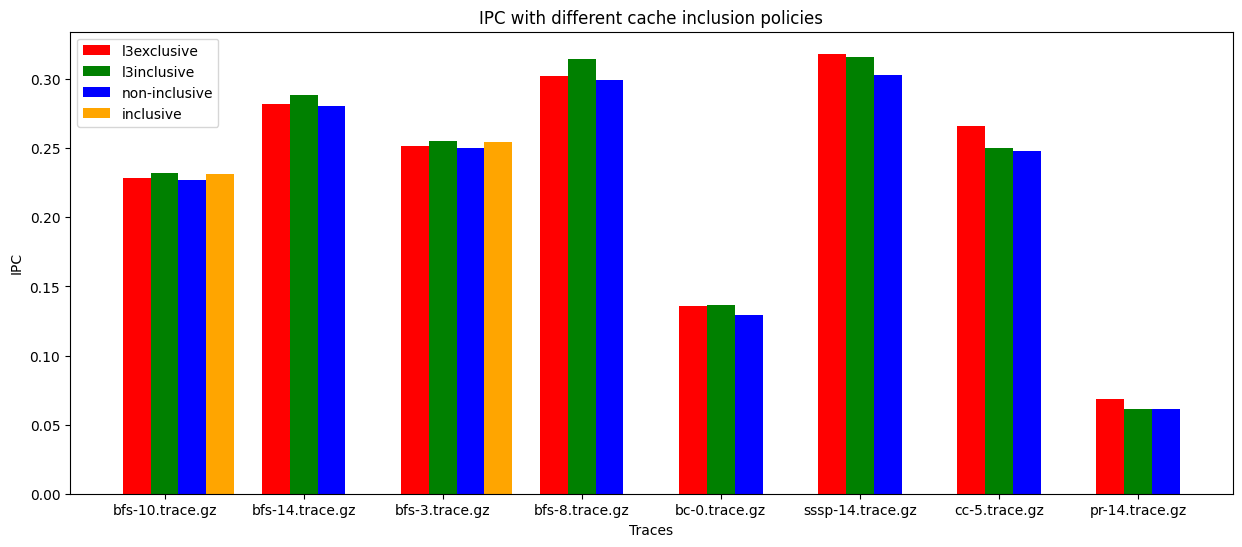

In [40]:
N = 8
ind = np.arange(N) 
width = 0.2
  
l3ex = []
l3inc = []
cache = []
inc = []
for i in range(len(df.index)):
    if df['policy'][i] == 'l3exclusive':
        l3ex.append(df['ipc'][i])
    elif df['policy'][i] == 'l3inclusive':
        l3inc.append(df['ipc'][i])
    elif df['policy'][i] == 'cache':
        cache.append(df['ipc'][i])
    else:
        inc.append(df['ipc'][i])

plt.figure(figsize=(15,6))
bar1 = plt.bar(ind, l3ex, width, color = 'r')
bar2 = plt.bar(ind+width, l3inc, width, color='g')
bar3 = plt.bar(ind+width*2, cache, width, color = 'b')
bar4 = plt.bar(ind+width*3, inc, width, color = 'orange')
  
plt.xlabel("Traces")
plt.ylabel('IPC')
plt.title("IPC with different cache inclusion policies")

plt.xticks(ind+width,df['trace'].unique())
plt.legend( (bar1, bar2, bar3, bar4), ('l3exclusive', 'l3inclusive', 'non-inclusive', 'inclusive') )
plt.savefig("ipc_policyComparison.jpg")
plt.show()